#INSAID Hiring Exercise

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Importing the libraries and data

In [2]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df=pd.read_csv('/content/drive/MyDrive/Fraud.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


###This is a binary classification problem statement.

## EDA

In [4]:
df.shape

(6362620, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

Since it shows null vaues, there is no missing data in this dataset.

In [7]:
df['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

This shows that the dataset is purely imbalanced dataset.

In [8]:
df['isFlaggedFraud'].value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

i am going to drop the two features [nameOrig, nameDest]. Because these are like IDs. So it doesn't seems much important to the dataset.

In [10]:
df.drop(['nameOrig', 'nameDest'], axis=1, inplace=True)
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,0
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,0


##Data Visualization

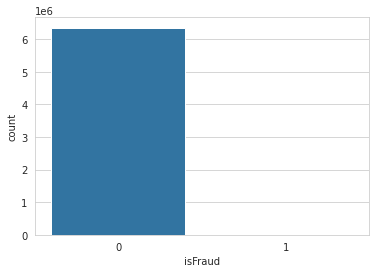

In [11]:
sns.set_style('whitegrid')
sns.countplot(x='isFraud', data=df)

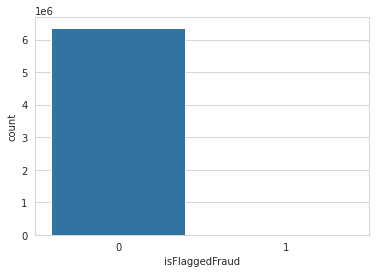

In [12]:
sns.set_style('whitegrid')
sns.countplot(x='isFlaggedFraud', data=df)

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

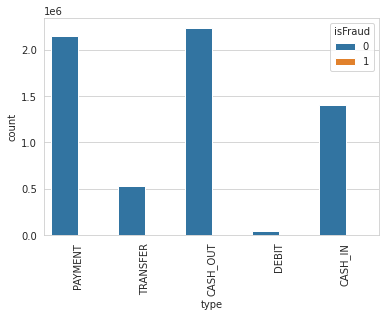

In [13]:
sns.countplot(data = df, x = "type",hue = "isFraud")
plt.xticks(rotation =90)

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

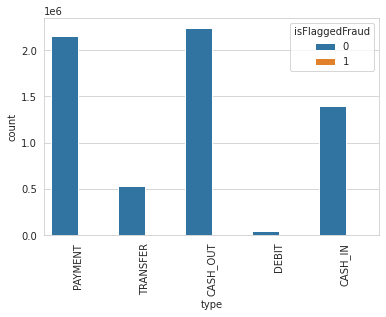

In [14]:
sns.countplot(data = df, x = "type",hue = "isFlaggedFraud")
plt.xticks(rotation =90)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Transactions over the Time')

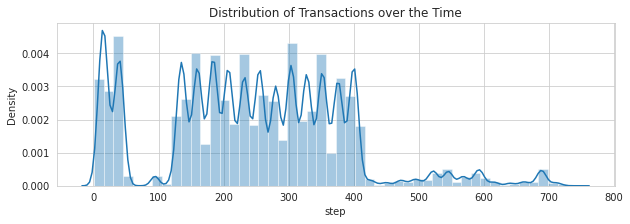

In [15]:
#Distribution of the frequency of all transactions
plt.figure(figsize=(10, 3))
sns.distplot(df.step)
plt.title('Distribution of Transactions over the Time')

Distrubition plot shows number of transactions occured each hour (step). There are drastic changes in the number of transactions happens time to time.

In [16]:
 # Filter data by the labels and examine two groups compairing each other --- Safe and Fraud transaction
safe = df[df['isFraud']==0]
fraud = df[df['isFraud']==1]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


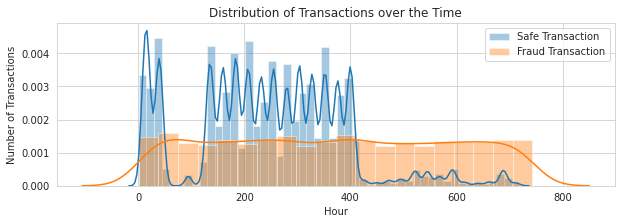

In [17]:
#See the frequency of the transactions for each class on the same plot.
plt.figure(figsize=(10, 3))
sns.distplot(safe.step, label="Safe Transaction")
sns.distplot(fraud.step, label='Fraud Transaction')
plt.xlabel('Hour')
plt.ylabel('Number of Transactions')
plt.title('Distribution of Transactions over the Time')
plt.legend()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


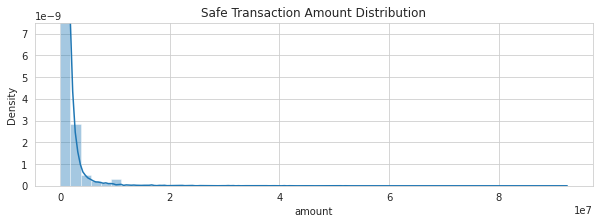

In [18]:
#safe transactions amount distribution plot
plt.figure(figsize=(10,3))
plt.ylim(0, 0.0000000075)
plt.title('Safe Transaction Amount Distribution')
sns.distplot(safe.amount)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


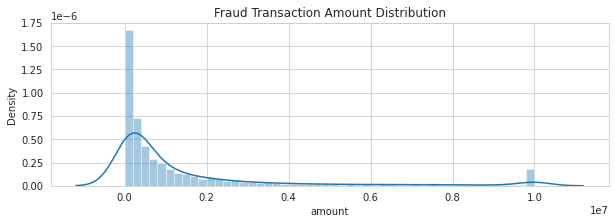

In [19]:
# Fraud transactions amount distribution plot
plt.figure(figsize=(10,3))
plt.title('Fraud Transaction Amount Distribution')
sns.distplot(fraud.amount)

In [20]:
# fraud transactions amount value counts
fraud.amount.value_counts()

10000000.00    287
0.00            16
429257.45        4
1165187.89       4
76646.05         2
              ... 
3576297.10       1
23292.30         1
1078013.76       1
112486.46        1
4892193.09       1
Name: amount, Length: 3977, dtype: int64

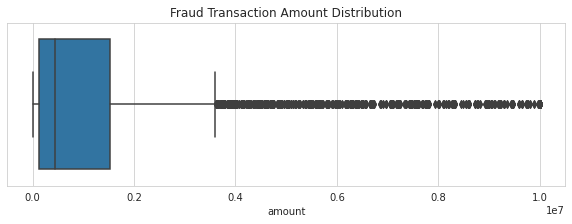

In [21]:
#Fraud transaction boxplot for amount distribution
plt.figure(figsize=(10,3))
plt.title('Fraud Transaction Amount Distribution')
ax = sns.boxplot(x=fraud["amount"])

In [22]:
#checking "0" in the fraud  amount
fraud[fraud.amount==0]

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736447,212,CASH_OUT,0.0,0.0,0.0,0.00,0.00,1,0
3247298,250,CASH_OUT,0.0,0.0,0.0,0.00,0.00,1,0
3760289,279,CASH_OUT,0.0,0.0,0.0,538547.63,538547.63,1,0
5563714,387,CASH_OUT,0.0,0.0,0.0,7970766.57,7970766.57,1,0
5996408,425,CASH_OUT,0.0,0.0,0.0,76759.90,76759.90,1,0
5996410,425,CASH_OUT,0.0,0.0,0.0,2921531.34,2921531.34,1,0
6168500,554,CASH_OUT,0.0,0.0,0.0,230289.66,230289.66,1,0
6205440,586,CASH_OUT,0.0,0.0,0.0,1328472.86,1328472.86,1,0
6266414,617,CASH_OUT,0.0,0.0,0.0,0.00,0.00,1,0
6281483,646,CASH_OUT,0.0,0.0,0.0,0.00,0.00,1,0


fraud amount == 0. They are definetely not correct data. But it might have some sort of value such as creating some noise in the transaction traffic to make the real fraud not to be noticed. For that reason I will keep this data.

In [23]:
#checking type of  safe transactions
safe.type.value_counts()

CASH_OUT    2233384
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     528812
DEBIT         41432
Name: type, dtype: int64

In [24]:
#checking type of fraud transactions
fraud.type.value_counts()

CASH_OUT    4116
TRANSFER    4097
Name: type, dtype: int64

Fraud activities only happens with transfer and cash_out transactions. Debit usage is very safe. It will be better to use only Transfer and Cash_out transaction data for our model since the other types has no fraud.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8dd2af8d10>,
      dtype=object)

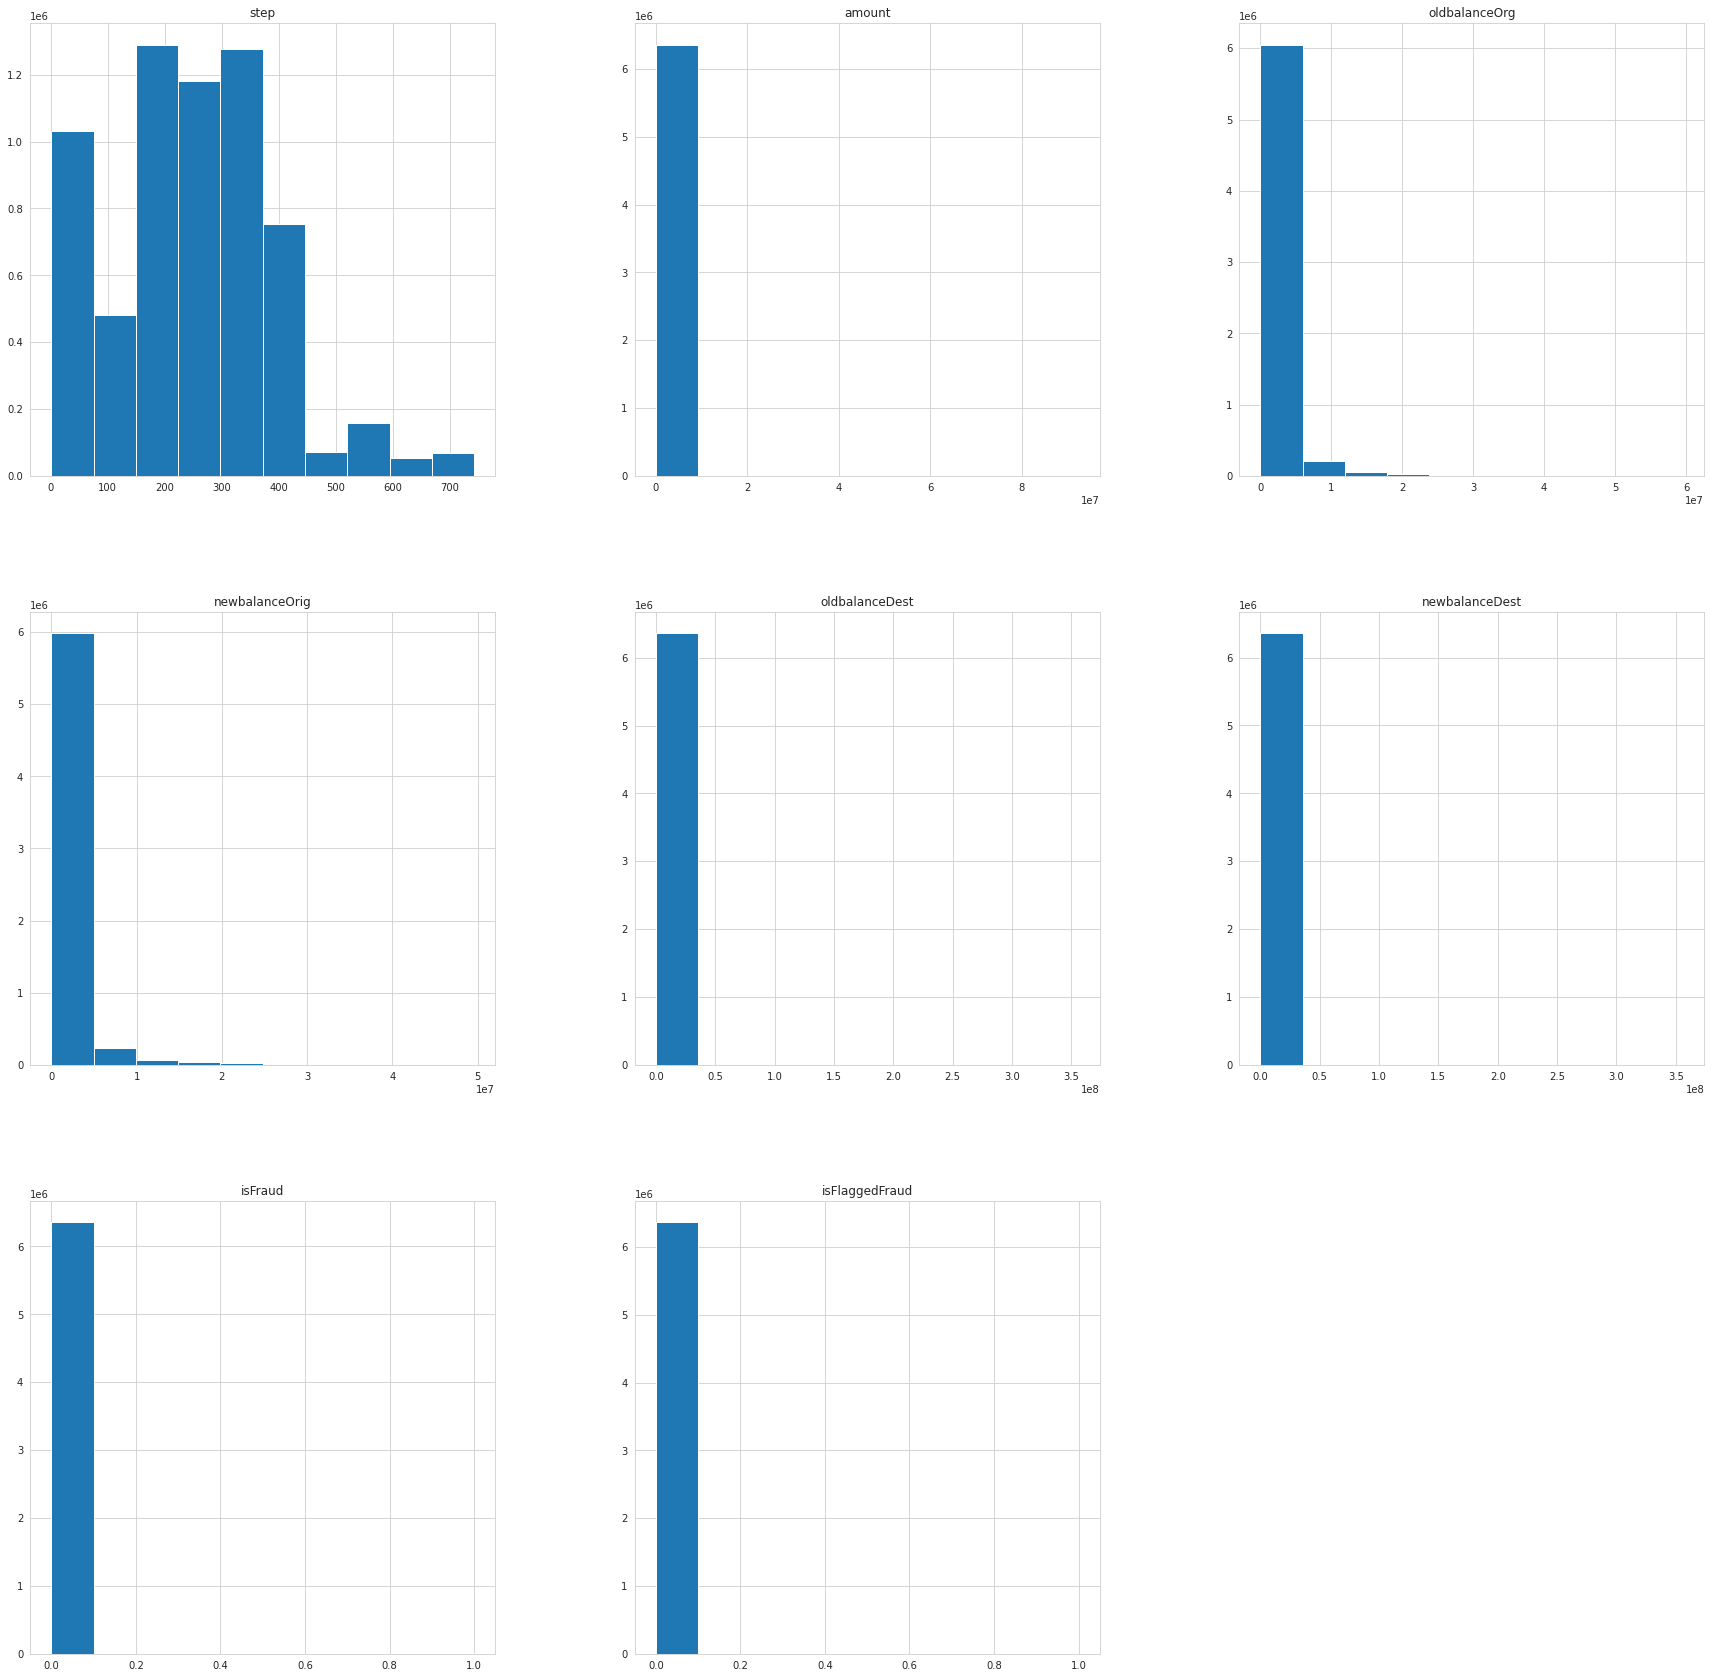

In [26]:
df.hist(figsize=(30,30))

All the variables in this dataset are pretty skewed. It might be problem in the model but we will see.

In [27]:
#value counts of isFlaggedFraud column
df.isFlaggedFraud.value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

In [28]:
#there are only 16 positive value. lets see which ones they are. 
df[df.isFlaggedFraud==1]

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736446,212,TRANSFER,4953893.08,4953893.08,4953893.08,0.0,0.0,1,1
3247297,250,TRANSFER,1343002.08,1343002.08,1343002.08,0.0,0.0,1,1
3760288,279,TRANSFER,536624.41,536624.41,536624.41,0.0,0.0,1,1
5563713,387,TRANSFER,4892193.09,4892193.09,4892193.09,0.0,0.0,1,1
5996407,425,TRANSFER,10000000.00,19585040.37,19585040.37,0.0,0.0,1,1
5996409,425,TRANSFER,9585040.37,19585040.37,19585040.37,0.0,0.0,1,1
6168499,554,TRANSFER,3576297.10,3576297.10,3576297.10,0.0,0.0,1,1
6205439,586,TRANSFER,353874.22,353874.22,353874.22,0.0,0.0,1,1
6266413,617,TRANSFER,2542664.27,2542664.27,2542664.27,0.0,0.0,1,1
6281482,646,TRANSFER,10000000.00,10399045.08,10399045.08,0.0,0.0,1,1


All positive values in isFlaggedFraud are also positive on is Fraud Column. There is also inconsistancy in Origin and destination balances on these instances.May be that is why they were marked 'Fraud'. It could be valuable information, I will keep it too.

##FEATURE ENGINEERING


First only get Transfer and Cash_out transaction data

Since fraud transactions happens only in these type of transactions, I will use only that data.


In [30]:
#filtering only transfer and cash_out data
df_by_type=df[df['type'].isin(['TRANSFER','CASH_OUT'])]


Get 100000 random samples from the filtered data

This data is too big to work with a machine learning algorithm. I will get random subsample from this dataframe just big enough to built a machine learning model. For such project 100000 instance would be good.


In [31]:
#subsample data , get 100000 instances to train model
df1=df_by_type.sample(n=100000, random_state=1)
df1=df1.sort_index()
df1=df1.reset_index(drop=True)
df1.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,CASH_OUT,136872.92,162075.98,25203.05,217806.00,0.00,0,0
1,1,TRANSFER,367768.40,0.00,0.00,370763.10,16518.36,0,0
2,1,CASH_OUT,81029.86,0.00,0.00,105343.00,8496.61,0,0
3,1,CASH_OUT,53631.83,0.00,0.00,83244.00,0.00,0,0
4,1,CASH_OUT,365510.05,0.00,0.00,564572.76,1254956.07,0,0


In [32]:
df1.shape

(100000, 9)

In [34]:
#Binary-encoding of labelled data in 'type'
df1.loc[df1.type == 'CASH_OUT', 'type'] = 1
df1.loc[df1.type == 'TRANSFER', 'type'] = 0
df1.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,1,136872.92,162075.98,25203.05,217806.00,0.00,0,0
1,1,0,367768.40,0.00,0.00,370763.10,16518.36,0,0
2,1,0,81029.86,0.00,0.00,105343.00,8496.61,0,0
3,1,1,53631.83,0.00,0.00,83244.00,0.00,0,0
4,1,1,365510.05,0.00,0.00,564572.76,1254956.07,0,0


In [35]:
from sklearn.model_selection import train_test_split # import train_test_split function
from sklearn.linear_model import LogisticRegression # import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score # import accuracy metrics
from sklearn.ensemble import RandomForestClassifier #import RandomForestClassifier
from sklearn import svm  #import support vector machine classifier
import xgboost as xgb  
from xgboost import  XGBClassifier  #import xgboost classifier 
from sklearn.neighbors import KNeighborsClassifier #import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV # import GridSearchCV
# suppress all warnings
import warnings
warnings.filterwarnings("ignore")

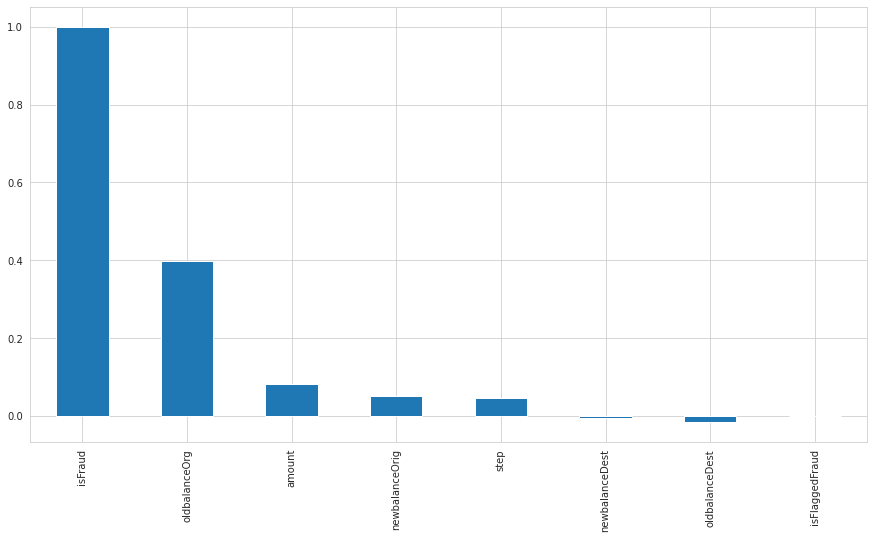

In [38]:
plt.figure(figsize=(15,8))
df1.corr()['isFraud'].sort_values(ascending = False).plot(kind='bar')

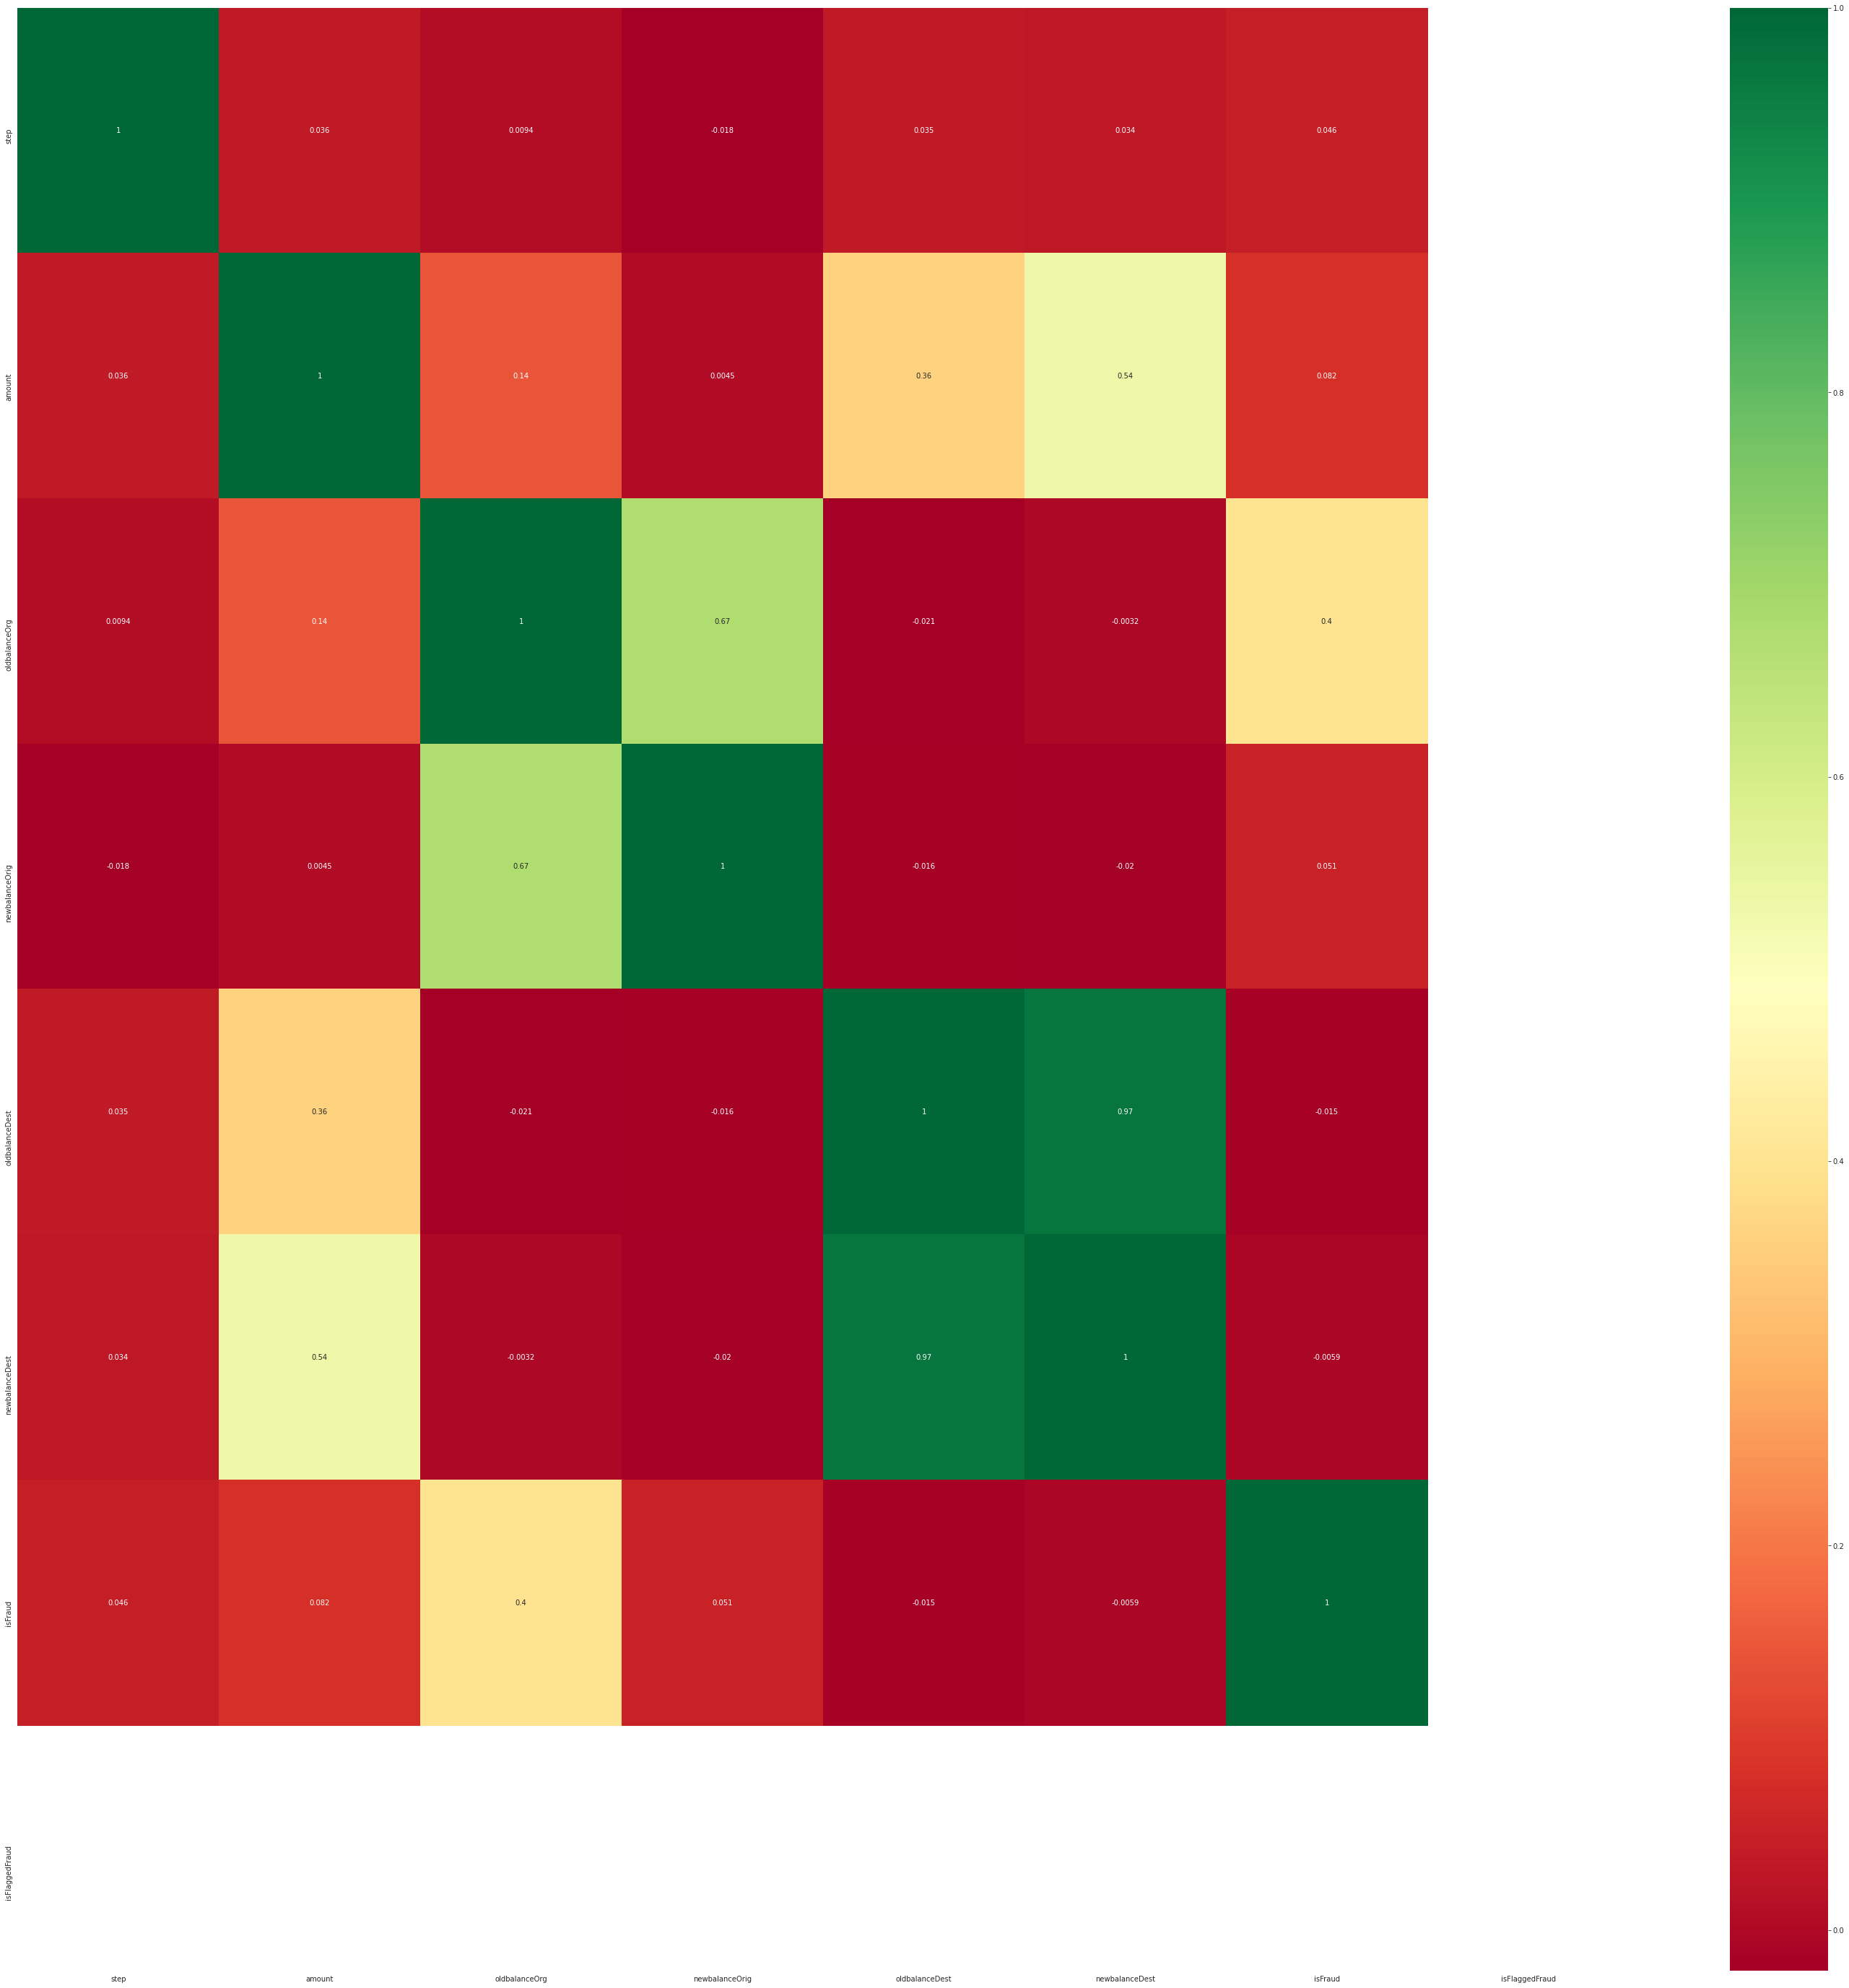

In [39]:
# plotting correlation heatmap for how many columns are correlated with each other
plt.figure(figsize=(50,50))
#plot heat map
g=sns.heatmap(df1.corr(),annot=True,cmap="RdYlGn")

In [45]:
df1.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,1,136872.92,162075.98,25203.05,217806.00,0.00,0,0
1,1,0,367768.40,0.00,0.00,370763.10,16518.36,0,0
2,1,0,81029.86,0.00,0.00,105343.00,8496.61,0,0
3,1,1,53631.83,0.00,0.00,83244.00,0.00,0,0
4,1,1,365510.05,0.00,0.00,564572.76,1254956.07,0,0


In [46]:
df1['type'] = pd.to_numeric(df1['type'])

In [47]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            100000 non-null  int64  
 1   type            100000 non-null  int64  
 2   amount          100000 non-null  float64
 3   oldbalanceOrg   100000 non-null  float64
 4   newbalanceOrig  100000 non-null  float64
 5   oldbalanceDest  100000 non-null  float64
 6   newbalanceDest  100000 non-null  float64
 7   isFraud         100000 non-null  int64  
 8   isFlaggedFraud  100000 non-null  int64  
dtypes: float64(5), int64(4)
memory usage: 6.9 MB


In [48]:
x=df1.drop(['isFraud'], axis = 1)
y=df1['isFraud']
x.shape, y.shape

((100000, 8), (100000,))

In [49]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(x,y, test_size =0.20, random_state = 3)

###MODEL BUILDING -- RANDOM FOREST CLASSIFIER

In [42]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=1000, max_depth=10, min_samples_leaf=2, random_state=1)
clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)

In [43]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, roc_curve, auc

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19935
           1       0.96      0.66      0.78        65

    accuracy                           1.00     20000
   macro avg       0.98      0.83      0.89     20000
weighted avg       1.00      1.00      1.00     20000

[[19933     2]
 [   22    43]]
accuracy is 0.9988


#### XGBOOST CLASSIFIER

In [50]:
from xgboost import XGBClassifier
clf = XGBClassifier(n_estimators=1000)
clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)

In [51]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, roc_curve, auc

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19935
           1       0.98      0.72      0.83        65

    accuracy                           1.00     20000
   macro avg       0.99      0.86      0.92     20000
weighted avg       1.00      1.00      1.00     20000

[[19934     1]
 [   18    47]]
accuracy is 0.99905


###HYPERPARAMETER TUNING FOR RANDOM FOREST CLASSIFIER

In [52]:
params={'n_estimators': [100, 200, 300, 400, 500, 600, 800, 1000, 2000],
        'max_depth' : [3, 4, 5, 6, 8, 10, 12, 15, 20, 25, 30],
         'min_samples_leaf' : [1, 3, 5, 7],
        'max_features' : [1, 2, 3, 4, 5], 
        'criterion' : ['gini', 'entropy']}

In [53]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()

In [54]:
random_search=RandomizedSearchCV(clf, param_distributions=params, n_iter=5, n_jobs=-1, cv=5, verbose=3)
random_search.fit(x_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed: 15.6min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [55]:
random_search.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=20, max_features=3,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=800,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [56]:
clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=20, max_features=3,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=800,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [58]:
clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)

In [59]:
from sklearn.metrics import accuracy_score 
accuracy_score(y_test, y_pred)

0.99895

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, roc_curve, auc

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

#### HYPERPARAMETER TUNING FOR XGBOOST CLASSIFIER

In [60]:
import xgboost

In [61]:
params={'learning_rate': [0.05, 0.10, 0.15, 0.20, 0.25, 0.30],
        'max_depth' : [3, 4, 5, 6, 8, 10, 12, 15, 20, 25, 30],
         'min_child_weight' : [1, 3, 5, 7],
        'gamma' : [0.0, 0.1, 0.2, 0.3, 0.4], 
        'colsample_bytree' : [0.3, 0.4, 0.5, 0.7]}

In [62]:
clf1=xgboost.XGBClassifier()

In [63]:
random_search=RandomizedSearchCV(clf1, param_distributions=params, n_iter=5, n_jobs=-1, cv=5, verbose=3)
random_search.fit(x_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   48.7s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, sc...
                                           verbosity=1),
                   iid='deprecated', n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0

In [65]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.2,
              learning_rate=0.15, max_delta_step=0, max_depth=5,
              min_child_weight=5, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [67]:
clf1=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.2,
              learning_rate=0.15, max_delta_step=0, max_depth=5,
              min_child_weight=5, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [68]:
clf1.fit(x_train, y_train)
y_pred=clf1.predict(x_test)

In [69]:
from sklearn.metrics import accuracy_score 
accuracy_score(y_test, y_pred)

0.9991

In [70]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, roc_curve, auc

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19935
           1       1.00      0.72      0.84        65

    accuracy                           1.00     20000
   macro avg       1.00      0.86      0.92     20000
weighted avg       1.00      1.00      1.00     20000

[[19935     0]
 [   18    47]]


## Feature Importance

Lets check whick features are the most influencial ones for both model.


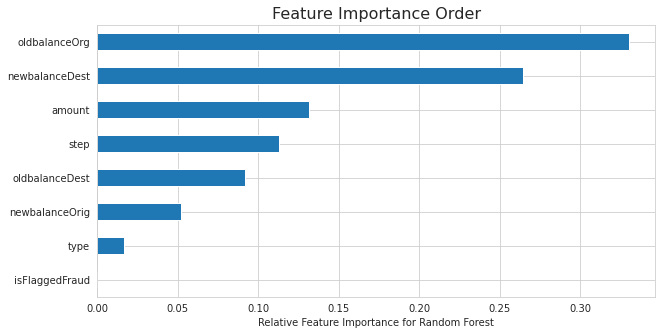

In [71]:
# plot the important features - based on Random Forest
feat_importances = pd.Series(clf.feature_importances_, index=features.columns)
ax.set_ylabel('features', size = 16);
feat_importances.nlargest(10).sort_values().plot(kind='barh', figsize=(10,5))
plt.xlabel('Relative Feature Importance for Random Forest');
plt.title('Feature Importance Order', size = 16);

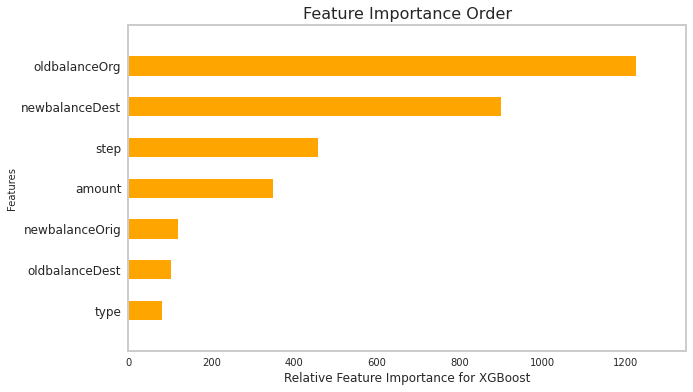

In [72]:
# plot the important features - based on XGBOOST
from xgboost import plot_importance

fig = plt.figure(figsize = (10, 6))
ax = fig.add_subplot(111)
colours = plt.cm.Set1(np.linspace(0, 1, 9))
ax = plot_importance(clf1, height = 0.5, color = 'orange', grid = False, \
                     show_values = False, importance_type = 'cover', ax = ax);
for axis in ['top','bottom','left','right']:
            ax.spines[axis].set_linewidth(2)        
ax.set_xlabel('Relative Feature Importance for XGBoost', size=12);
ax.set_yticklabels(ax.get_yticklabels(), size = 12);
ax.set_title('Feature Importance Order', size = 16);

Each model gives different importance to the features. But oldbalanceOrg and newbalanceDest are the major indicators for both models.

Conclusion: I created a model that can predict fraud transactions. I used XGBoost and RandomForest classifiers in this model. Both are giving me 99% accuracy. But XGBOOST classifier gives me 99.9%.

##Q&A

### 1. Data cleaning including missing values, outliers and multi-collinearity.

#####Missing values are not present in present dataset. The data is skewed, so we can't say it's a outlier. There are some correlated features (multicollinearity) present in the dataset. But i still take all features to my machine learning model.

### 2. Describe your fraud detection model in elaboration.

#####We use Supervised Machine Learning model for detecting fraud. Here, a machine tries to learn by itself and becomes better by experience. Also, it is an efficient way of detecting fraud because of its fast computing. It does not even require the guidance of a fraud analyst. It helps in reducing false positives for transactions as the patterns are detected by an automated system for streaming transactions that are in huge volume. 
1. Feeding Data: First, the data is fed into the model. The accuracy of the model depends on the amount of data on which it is trained, more data better the model performs.

2. Extracting Features: Feature extraction basically works on extracting the information of each and every thread associated with a transaction process. 

    
3. Training the Algorithm: Once i have created a fraud detection algorithm(here i am using random forest classifier), i need to train it by providing customers data so that the fraud detection algorithm learns how to distinguish between ‘fraud’ and ‘genuine’ transactions.

4. Creating a Model: Once i have trained my fraud detection algorithm on a specific dataset, my model is ready to detect the ‘fraudulent’ and ‘non-fraudulent’ transactions.


###3. How did you select variables to be included in the model?

##### Since the variables has  less number, I have selected all my variables to run my model (excluding the variables --'nameOrig', 'nameDest' both are name type. so i avoid this)

###4. Demonstrate the performance of the model by using best set of tools.

#####XGBoost classifier has always been an influential method in data science. I found that the accuracy of the model is close to 99.9% on both training and testing datasets. The accuracy is significantly enough and implies that the model is robust. 

###5. What are the key factors that predict fraudulent customer?

#####Most important features are senders balance before the transaction (oldBalanceOrig) and receivers balance after the transaction (newBalanceDest). Fraud activities only happens with TRANSFER and CASH_OUT transactions. DEBIT usage is very safe. So these are important factors to predict fraudulent transactions.

###6. Do these factors make sense? If yes, How? If not, How not?

#####Yes. Because it strongly correlates with target feature (isFraud).

###7. What kind of prevention should be adopted while company update its infrastructure?

#####I would like reindex this dataset with timestamps and analyze it as time series. I believe I would find some seasonality on both fraud transaction frequency and amount as well. It migth also help to predict fraud transactions, that way companies could be extra cautios.


###8. Assuming these actions have been implemented, how would you determine if they work?

#####In order to track the fraudulent transactions, personalized e-mails, aadhar card, or SMS (any kind of Identity verification) should be linked to the customer bank account. By using Machine Learning model, it will help, examine, and check identity documents against secure databases in real-time to ensure all fraud cases will be detected. To enhance the security provided with Machine Learning, additional verification such as face recognition or biometric information can be required. These security methods demand real individuals to authenticate the operation and significantly lower the chance for successful fraud.